In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_df = pd.read_csv("/Users/morgancordray/Desktop/programming/UA-PHX-DATA-PT-08-2019-U-C/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv")
drug_df = pd.read_csv("/Users/morgancordray/Desktop/programming/UA-PHX-DATA-PT-08-2019-U-C/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv")

# Combine the data into a single dataset
df = pd.merge(trial_df, drug_df, on= "Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
#### Tumor Response to Treatment ######
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

df2 = df.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

# Preview DataFrame
df2.head(15)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#del df2["Metastatic Sites"]
df2["error"] = df2.sem(axis = 1, skipna = False)
# Convert to DataFrame

# Preview DataFrame
df2


Tumor Volume (mm3)  Metastatic Sites      error
Drug      Timepoint                                                 
Capomulin 0                   45.000000          0.000000  22.500000
          5                   44.266086          0.160000  22.053043
          10                  43.084291          0.320000  21.382145
          15                  42.064317          0.375000  20.844659
          20                  40.716325          0.652174  20.032076
...                                 ...               ...        ...
Zoniferol 25                  55.432935          1.687500  26.872717
          30                  57.713531          1.933333  27.890099
          35                  60.089372          2.285714  28.901829
          40                  62.916692          2.785714  30.065489
          45                  65.960888          3.071429  31.444730

[100 rows x 3 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames
del df2["Metastatic Sites"]
del df2["error"]
reformated = df2.unstack(level = 0,fill_value=0)
# Preview that Reformatting worked

reformated_df = reformated[[('Tumor Volume (mm3)', 'Ketapril'),('Tumor Volume (mm3)', 'Capomulin'),('Tumor Volume (mm3)', 'Infubinol'),('Tumor Volume (mm3)', 'Placebo')]]
reformated_df

Tumor Volume (mm3)                                 
Drug                Ketapril  Capomulin  Infubinol    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  47.389175  44.266086  47.062001  47.125589
10                 49.582269  43.084291  49.403909  49.423329
15                 52.399974  42.064317  51.296397  51.359742
20                 54.920935  40.716325  53.197691  54.364417
25                 57.678982  39.939528  55.715252  57.482574
30                 60.994507  38.769339  58.299397  59.809063
35                 63.371686  37.816839  60.742461  62.420615
40                 66.068580  36.958001  63.162824  65.052675
45                 70.662958  36.236114  65.755562  68.084082

In [5]:
# Generate the Plot (with Error Bars)
yerror = reformated_df.sem(axis = 1, skipna = False)

reformated_df
yerror1 = .5
#np.random.random_sample(1)
yerror1


0.5

In [6]:
Ksem = reformated_df['Tumor Volume (mm3)', 'Ketapril'].sem()
Csem =reformated_df['Tumor Volume (mm3)', 'Capomulin'].sem()
Isem = reformated_df['Tumor Volume (mm3)', 'Infubinol'].sem()
Psem = reformated_df['Tumor Volume (mm3)', 'Placebo'].sem()
error = [Ksem, Csem, Isem, Psem]
error

[2.671727801269364, 0.9709032345000089, 2.2059693464844656, 2.4790693897668596]

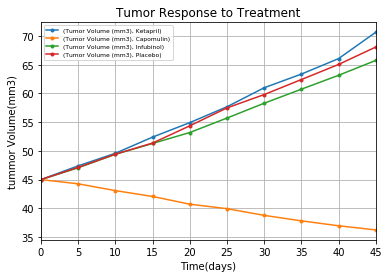

In [7]:
#reformated_df = reformated_df.reset_index()
reformated_df.plot(kind="line", marker =".")
reformated_df = reformated_df.reset_index()
#plt.errorbar(y=reformated_df['Timepoint'],x=reformated_df['Tumor Volume (mm3)', 'Ketapril'],yerr=yerror1)
plt.grid()
plt.xlabel("Time(days)")
plt.ylabel("tummor Volume(mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc=2, prop={'size': 6})

# Save the Figure
plt.show()

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = df[["Drug","Timepoint","Metastatic Sites"]]


#df
# Convert to DataFrame
mean_met = mean_met.groupby(["Drug","Timepoint"]).mean()
# Preview DataFrame
mean_met.head(15)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met = mean_met.sem()
# Convert to DataFrame

# Preview DataFrame
SE_met

Metastatic Sites    0.090044
dtype: float64

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_reformated = mean_met.unstack(level = 0,fill_value=0)
met_reformated
# Preview that Reformatting worked


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

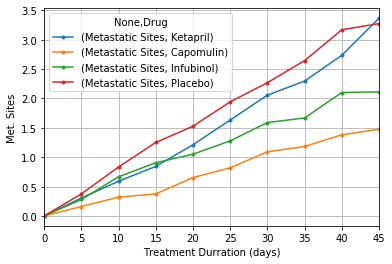

In [11]:
# Generate the Plot (with Error Bars)
met_reformated = met_reformated[[("Metastatic Sites","Ketapril"), ("Metastatic Sites","Capomulin"), ("Metastatic Sites","Infubinol"), ("Metastatic Sites","Placebo")]]
met_reformated.plot(kind = "line", marker =".")
plt.grid()
# Save the Figure
plt.xlabel("Treatment Durration (days)")
plt.ylabel("Met. Sites")
# Show the Figure
plt.show()

In [31]:
#### Survival Rates ####
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = df.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"count"})

# Convert to DataFrame

# Preview DataFrame
mice

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [32]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformated = mice.unstack(level = 1)
mice_reformated = mice_reformated.T
mice_reformated = mice_reformated[["Ketapril", "Capomulin", "Infubinol", "Placebo"]]
mice_reformated
# Calculate the percent changes for each drug


# Display the data to confirm
mice_reformated = mice_reformated.pct_change()
# Preview the Data Frame
mice_reformated

Drug                Ketapril  Capomulin  Infubinol   Placebo
         Timepoint                                          
Mouse ID 0               NaN        NaN        NaN       NaN
         5         -0.080000   0.000000   0.000000 -0.040000
         10        -0.043478   0.000000  -0.160000  0.000000
         15        -0.136364  -0.040000   0.000000 -0.166667
         20         0.000000  -0.041667  -0.047619 -0.050000
         25         0.000000  -0.043478  -0.100000 -0.105263
         30        -0.052632   0.000000  -0.055556 -0.117647
         35        -0.055556   0.000000  -0.294118 -0.066667
         40        -0.117647  -0.045455  -0.166667 -0.142857
         45        -0.266667   0.000000  -0.100000 -0.083333

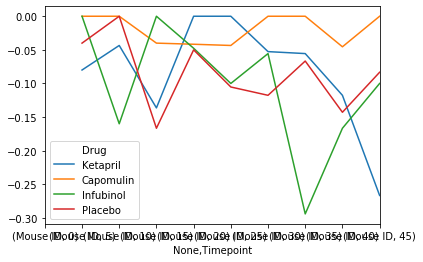

In [33]:
# Generate the Plot (Accounting for percentages)
#mice_reformated.rename(index= {("Mouse ID", 0): "0"})
#axes = plt.gca()


#axes.set_xlim([0,50])
#axes.set_ylim([35,100])
#plt.xticks(ticks=None, labels=None)
ax = mice_reformated.plot()
#plt.axis(0.0,9.0,11.0,26.0)

#axes.set(xlim=(0, 45), ylim=(10, 26))


# Save the Figure

# Show the Figure
plt.show()

In [27]:
#### Summary Bar Graph ######

# Calculate the percent changes for each drug
pct_change = mice.pct_change()
pct_change
# Display the data to confirm


Mouse ID
Drug      Timepoint          
Capomulin 0               NaN
          5          0.000000
          10         0.000000
          15        -0.040000
          20        -0.041667
...                       ...
Zoniferol 25        -0.058824
          30        -0.062500
          35        -0.066667
          40         0.000000
          45         0.000000

[100 rows x 1 columns]

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

In [ ]:
len(df2)

In [ ]:
reformated_df[('Tumor Volume (mm3)', 'Ketapril')]

In [ ]:
yerror.tolist()

In [ ]:
series = pd.Series(reformated_df[('Tumor Volume (mm3)', 'Ketapril')])
series

In [ ]:
series.tolist()
df3= reformated_df[["Timepoint",('Tumor Volume (mm3)', 'Ketapril')]]
df3["Timepoint"] = reformated_df["Timepoint"].tolist()

In [ ]:
reformated_df["Timepoint"]

In [ ]:
test = pd.DataFrame({"Timepoint":[0,5,10],"Tumor1":[45.3,44,47.9],"Tumor2":[36.7,42.1,39.8]})
#,"error":[.3,.6,.2]
error = .4
test.head()
#test = test.set_index("Timepoint")

plt.errorbar(x=test["Timepoint"],y=test["Tumor1"],yerr=error)

In [ ]:
df.head(30)